# Remoção de outliers
- Outliers são valores dispersos, muito maiores ou menores que todos os valores de um conjunto de dados e que podem distorcer a realidade de um grupo.
- outliers podem ocorrer por diversos fatores como erro de digitação, erro de leitura de dados ou sensores, falha na coleta dos dados e etc.

## Bibliotecas


In [26]:
import pandas as pd 
import numpy as np 

## Dataframe
- Iremos usar o DF Titanic para exemplificar

In [37]:
df = pd.read_csv('titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Limpeza rápida nos dados

In [38]:
df.shape

(891, 12)

In [41]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
df = df.drop('Cabin', axis=1)
df = df.dropna()

In [42]:
def limites(coluna):
    q1 = coluna.quantile(0.25) # pegar nosso 1 quartil
    q3 = coluna.quantile(0.75) # pegar nosso 3 quartil
    amplitude = q3 - q1

    lim_inf = q1 - 1.5 * amplitude
    lim_sup = q3 + 1.5 * amplitude

    return(lim_inf, lim_sup)


In [45]:
lim_inf, lim_sup = limites(df.Age)
print(lim_inf, lim_sup)

-7.0 65.0


In [ ]:
def excluir_outliers(df, nome_col):

    num_linhas = df.shape[0]

    lim_inf, lim_sup = limites(df[nome_col])

    df_limitado = df.loc[(df[nome_col] >= lim_inf) & (df[nome_col] <= lim_sup)]

    linhas_perdidas = num_linhas - df_limitado.shape[0]

    return (linhas_perdidas, df_limitado)

In [60]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [65]:
def diagrama_caixa(coluna):

    fig, (ax1, ax2) = plt.subplots(1, 2)

    fig.set_size_inches(15, 5)

    sns.boxplot(x=coluna, ax = ax1)

    ax2.set_xlim(limites(coluna))

    sns.boxplot(x=coluna, ax = ax2)



In [75]:
def hist(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(coluna, kde=True)

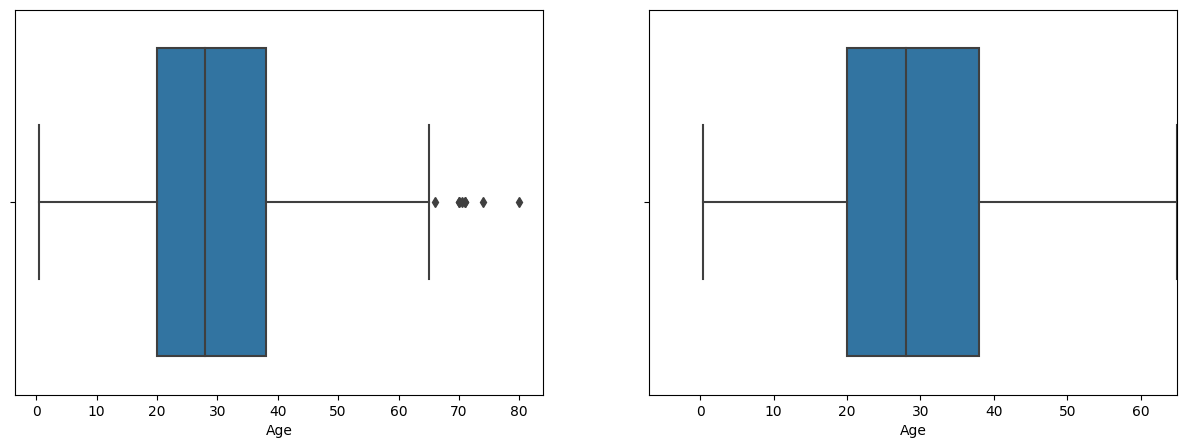

In [69]:
diagrama_caixa(df.Age)

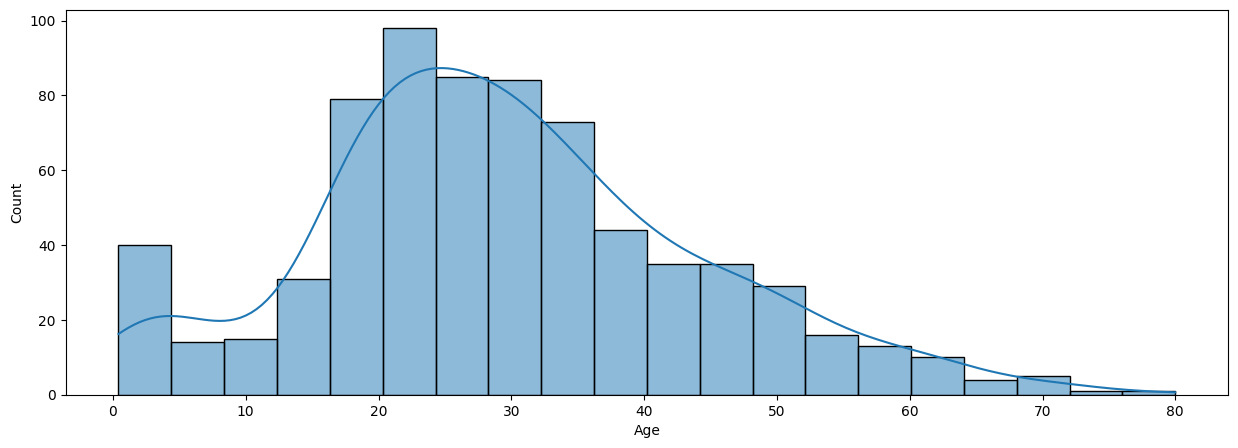

In [76]:
hist(df.Age)

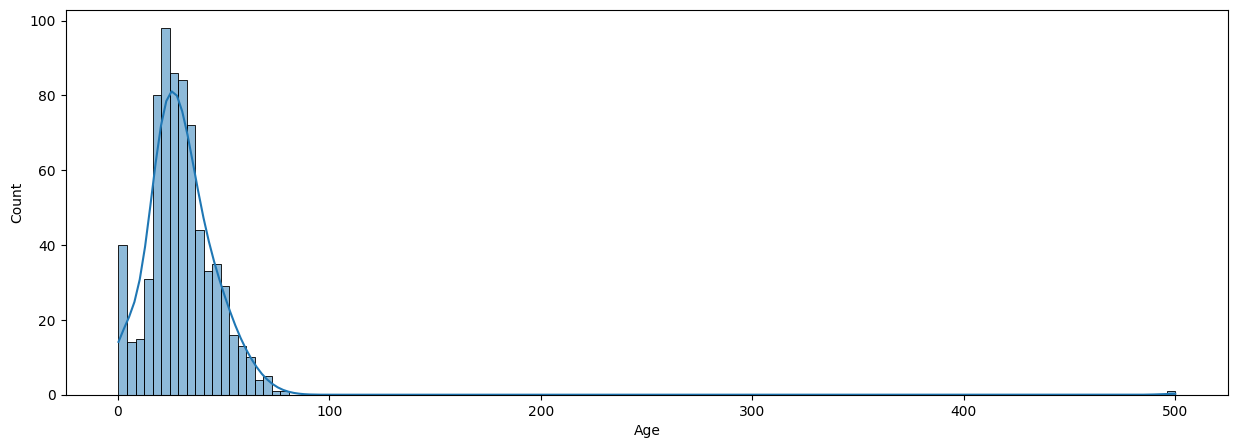

In [78]:
hist(df1.Age)

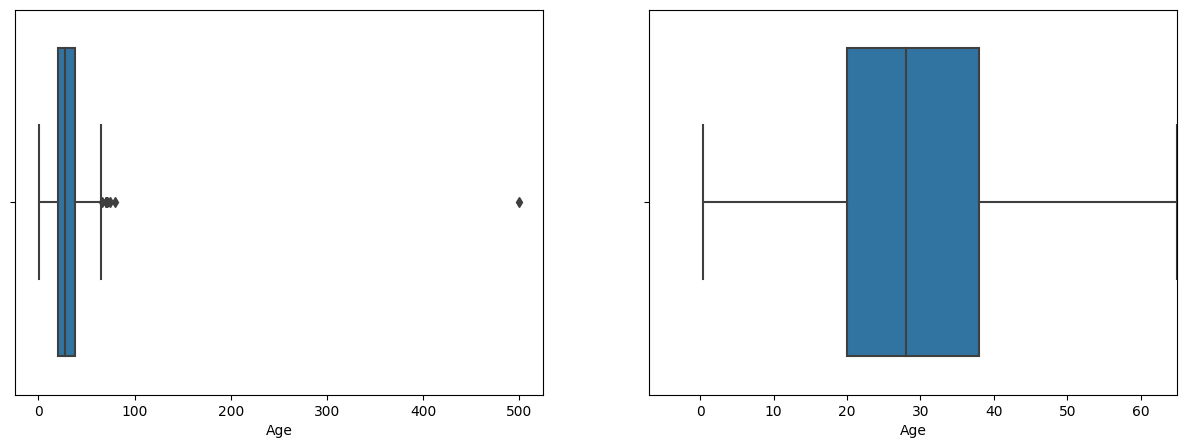

In [72]:
diagrama_caixa(df1.Age)

In [70]:
df1 = df.copy()https://youtu.be/2E9OWy6jfWg

In [71]:
df1.loc[1, 'Age'] = 500
df1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,500.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [84]:
df1.Age.mean()

30.290969101123594